In [2]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from linear import LinearRegression
from sklearn import datasets

In [3]:
cones_sold = [ 15, 20, 80, 205, 368, 426, 485]
avrg_high_temp = [ 1.0, 3.0, 7.3, 14.3, 21.2, 26.1, 28.6]

ice_cream_stand = {
    "cones_sold":cones_sold,
    "avrg_high_temp":avrg_high_temp
}
ice_cream_stand = pd.DataFrame(ice_cream_stand)
ice_cream_stand

,cones_sold,avrg_high_temp
0,15,1.0
1,20,3.0
2,80,7.3
3,205,14.3
4,368,21.2
5,426,26.1
6,485,28.6


<Axes: xlabel='cones sold', ylabel='avrg high temp'>

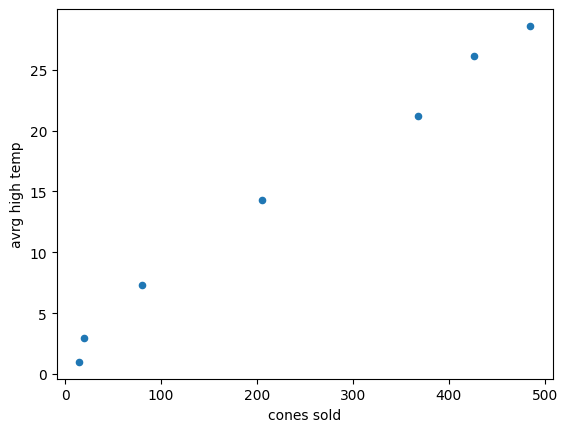

In [4]:
ice_cream_stand.plot(kind='scatter', x="cones sold", y="avrg high temp")

In [4]:
weight = [0.5, 2.3, 2.9]
height = [1.4, 1.9, 3.2]

weight_height_dt = {
    "weight":weight,
    "height":height
}

weight_height_dt = pd.DataFrame(weight_height_dt)
weight_height_dt

def test(X, y, n_iter=1000):
    learning_rate = np.float64(0.1)
    intercept = np.float64(0.0)
    slope = np.float64(1)
    Steps = n_iter

    for _ in range(Steps):
        y_pred = intercept + np.dot(slope, np.array(X))
        weight_height_dt.plot(kind='scatter', x="weight" , y="height")
        plt.plot(weight, y_pred, color='red')
        
        ssr = (y - (intercept + np.dot(slope, np.array(X))))**2
    
        der_intercept = -2*(y - (intercept + np.dot(slope, np.array(X))))
        # der_intercept = -2*(y - (intercept + np.dot(slope, np.array(X))))*(0 + np.dot(slope, np.array(X)))
        sum_intercept = sum(der_intercept)
        der_slope = np.dot(-2, np.array(X))*(y - (intercept + np.dot(slope, np.array(X))))
        # der_slope = -2*(y - (intercept + np.dot(slope, np.array(X))))*(intercept + np.dot(0, np.array(X)))
        sum_slope = sum(der_slope)
        Steps_size_intercept = sum_intercept * learning_rate
        intercept = intercept - Steps_size_intercept
        Steps_size_slope = sum_slope * learning_rate
        slope = slope - Steps_size_slope


    # for _ in range(Steps):
    #     y_pred = intercept + np.dot(slope, np.array(X))
    #     # weight_height_dt.plot(kind='scatter', x="weight" , y="height")
    #     # plt.plot(weight, y_pred, color='red')
        
    #     ssr = (y - (intercept + np.dot(slope, np.array(X))))**2
    #     der_intercept = -2*(y - (intercept + np.dot(slope, np.array(X))))*(0 + np.dot(slope, 0))
    #     sum_intercept = sum(der_intercept)
    #     der_slope = -2*(y - (intercept + np.dot(slope, np.array(X))))*(0 + np.dot(slope, np.array(X)))
    #     sum_slope = sum(der_slope)

    #     Steps_size_intercept = sum_intercept * learning_rate
    #     intercept = intercept - Steps_size_intercept

    #     Steps_size_slope = sum_slope * learning_rate
    #     slope = slope - Steps_size_slope
        

    
    return intercept + np.dot(slope, np.array(X))


Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
Epoch: 300
Epoch: 350
Epoch: 400
Epoch: 450
Epoch: 500
Epoch: 550
Epoch: 600


C:\Users\CLIENT\AppData\Local\Temp\ipykernel_6220\1778524822.py:11: RuntimeWarning: overflow encountered in scalar multiply
  m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
C:\Users\CLIENT\AppData\Local\Temp\ipykernel_6220\1778524822.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  m = m_now - m_gradient * l
C:\Users\CLIENT\AppData\Local\Temp\ipykernel_6220\1778524822.py:15: RuntimeWarning: invalid value encountered in scalar subtract
  b = b_now - m_gradient * l


Epoch: 650
Epoch: 700
Epoch: 750
Epoch: 800
Epoch: 850
nan nan


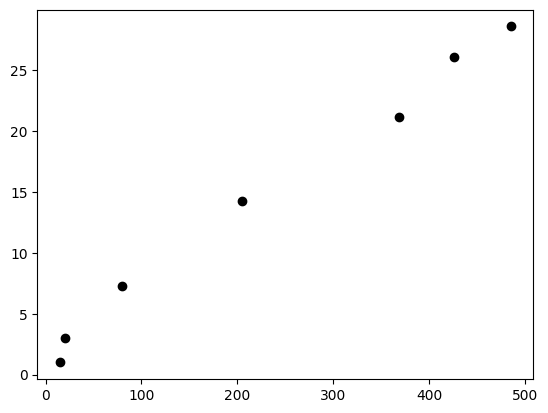

In [47]:



def gradient_descent(m_now, b_now, points, l):
    m_gradient = 0
    b_gradient = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i].cones_sold
        y = points.iloc[i].avrg_high_temp

        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
    
    m = m_now - m_gradient * l
    b = b_now - m_gradient * l

    return m ,b

m = 0
b = 0
l = 0.001
epochs = 900

for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch: {i}")

    m, b = gradient_descent(m_now=m, b_now=b, points= ice_cream_stand, l=l)

print(m, b)
plt.scatter(ice_cream_stand["cones_sold"], ice_cream_stand["avrg_high_temp"], color="black")
plt.plot(list(range(20, 80)), [m * x + b for x in range(20, 80)], color="red")
plt.show()


In [5]:
weight = [0.5, 2.3, 2.9]
height = [1.4, 1.9, 3.2]

weight_height_dt = {
    "weight":weight,
    "height":height
}

weight_height_dt = pd.DataFrame(weight_height_dt)
weight_height_dt

def test(X, y, n_iter=400):
    learning_rate = np.float64(0.001)
    i, n = X.shape
    a = 0
    b = np.zeros(n)

    for _ in range(n_iter):
            
        dfdm = (1/len(X))* np.dot(np.array(X).T, (y - y_hat(X, a, b)))
        dfdb = (1/len(X))* sum(y - y_hat(X, a, b))

        print(dfdm)
        print(dfdb)

        b = b - learning_rate * dfdm
        a = a - learning_rate * dfdb

        print(f"new slope {b}")
        print(f"new intercept {a}")

    return y_hat(X=X, a=a, b=b)

    # a is the intercept and b is the slope

# yhat is the predicted value
def y_hat(X, a, b):
    return a + np.dot(b.T, np.array(X))

# The square difference of predicted value and actual value
def sqrd_diff(y, y_hat):
    return (y - y_hat)**2

# Function for mean square error
def mse(X,y, sqrd_diff):
    return 1/len(X) * sum(np.power(y_hat - y, 2))

def gradient_descent(x, y, y_hat, b):
    afdb = 2/
    pass

In [5]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

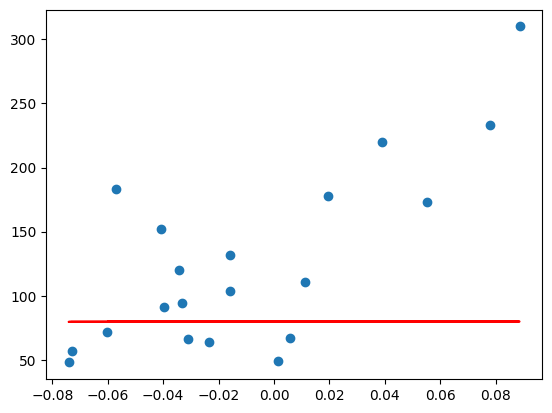

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X=diabetes_X_test, y=diabetes_y_test)
result = lin_reg.predict(X=diabetes_X_test)


y_pred = lin_reg.predict(diabetes_X)
#plt.scatter( diabetes_X_train , diabetes_y_train)
plt.scatter( diabetes_X_test , diabetes_y_test)
plt.plot(diabetes_X_test, result, color='red')

In [432]:
y_pred_test = test(weight, height)

[10.39477143]
new slope [10.39477143]
new intercept [10.39477143]
[-1759.01510088]
new slope [-1759.01510088]
new intercept [-1759.01510088]
[299421.56077504]
new slope [299421.56077504]
new intercept [299421.56077504]
[-50966110.86132512]
new slope [-50966110.86132512]
new intercept [-50966110.86132512]
[8.67521023e+09]
new slope [8.67521023e+09]
new intercept [8.67521023e+09]
[-1.47665323e+12]
new slope [-1.47665323e+12]
new intercept [-1.47665323e+12]
[2.51348926e+14]
new slope [2.51348926e+14]
new intercept [2.51348926e+14]
[-4.27834247e+16]
new slope [-4.27834247e+16]
new intercept [-4.27834247e+16]
[7.28239211e+18]
new slope [7.28239211e+18]
new intercept [7.28239211e+18]
[-1.23957432e+21]
new slope [-1.23957432e+21]
new intercept [-1.23957432e+21]
[2.10994476e+23]
new slope [2.10994476e+23]
new intercept [2.10994476e+23]
[-3.59144812e+25]
new slope [-3.59144812e+25]
new intercept [-3.59144812e+25]
[6.11319304e+27]
new slope [6.11319304e+27]
new intercept [6.11319304e+27]
[-1.040

C:\Users\CLIENT\AppData\Local\Temp\ipykernel_12976\299702359.py:23: RuntimeWarning: overflow encountered in add
  dfdm += -2*X[i] * (y[i] - (y_hat(X[i], a, b)))
C:\Users\CLIENT\AppData\Local\Temp\ipykernel_12976\299702359.py:23: RuntimeWarning: invalid value encountered in add
  dfdm += -2*X[i] * (y[i] - (y_hat(X[i], a, b)))


new intercept [nan]
[nan]
new slope [nan]
new intercept [nan]
[nan]
new slope [nan]
new intercept [nan]
[nan]
new slope [nan]
new intercept [nan]
[nan]
new slope [nan]
new intercept [nan]
[nan]
new slope [nan]
new intercept [nan]
[nan]
new slope [nan]
new intercept [nan]
[nan]
new slope [nan]
new intercept [nan]
[nan]
new slope [nan]
new intercept [nan]
[nan]
new slope [nan]
new intercept [nan]
[nan]
new slope [nan]
new intercept [nan]


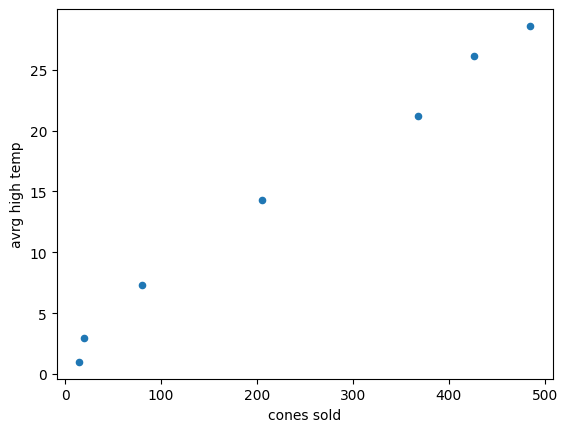

In [426]:
y_pred_icecream = test(ice_cream_stand["cones sold"], ice_cream_stand["avrg high temp"])
c

ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

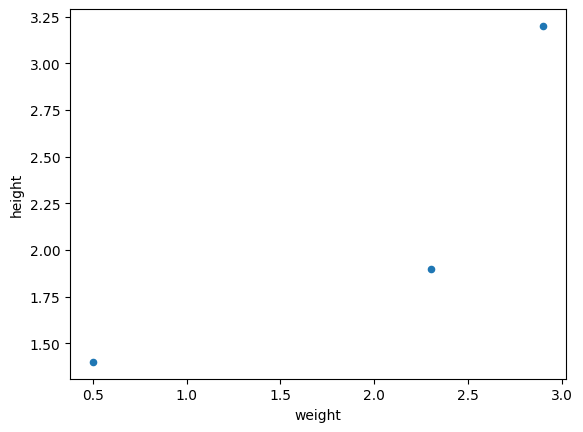

In [433]:
weight_height_dt.plot(kind='scatter', x="weight" , y="height")
plt.plot(weight, y_pred_test, color='red')